In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import random

In [20]:
def load_graph_from_parquet(parquet_path: str, num_rows: int = 10) -> nx.Graph:
    """Load the graph from a Parquet file, but only read the first 'num_rows' rows."""
    # Read only the first 'num_rows' rows from the Parquet file
    graph_df = pd.read_parquet(parquet_path, columns=["city_from", "city_to", "distance"]).head(num_rows)
    
    G = nx.Graph()
    
    # Adding edges from the DataFrame
    for _, row in graph_df.iterrows():
        city_from = row['city_from']
        city_to = row['city_to']
        distance = row['distance']
        
        # Add the edge
        G.add_edge(city_from, city_to, weight=distance)
    
    return G


In [21]:
def get_subgraph(graph: nx.Graph, num_nodes: int) -> nx.Graph:
    """Get a subgraph with a specified number of connected nodes."""
    # Randomly choose a starting node
    start_node = random.choice(list(graph.nodes()))
    
    # Perform a BFS to find connected nodes. Limit the search to num_nodes.
    subgraph_nodes = [start_node]
    visited = set(subgraph_nodes)
    
    while len(subgraph_nodes) < num_nodes:
        current_node = subgraph_nodes[-1]
        # Get all neighbors of the current node
        neighbors = list(graph.neighbors(current_node))
        
        # Filter out the neighbors that are already in the subgraph
        new_neighbors = [n for n in neighbors if n not in visited]
        
        # If we found new neighbors, add one randomly
        if new_neighbors:
            next_node = random.choice(new_neighbors)
            subgraph_nodes.append(next_node)
            visited.add(next_node)
    
    # Create a subgraph using the selected nodes
    subgraph = graph.subgraph(subgraph_nodes).copy()
    
    return subgraph


In [43]:
parquet_path = r"C:\Users\vikne\Documents\Master 2\Semestre 9\Intelligence artificielle\Travel-Order-Resolver\ai\path_algorithm\dataset\graph.parquet"

print("Loading graph from Parquet...")
graph = load_graph_from_parquet(parquet_path, num_rows=15)
print("Graph loaded.")

nodes_to_include = list(graph.nodes())[:15]
subgraph = graph.subgraph(nodes_to_include).copy()
print("Subgraph selected.")


Loading graph from Parquet...
Graph loaded.
Subgraph selected.


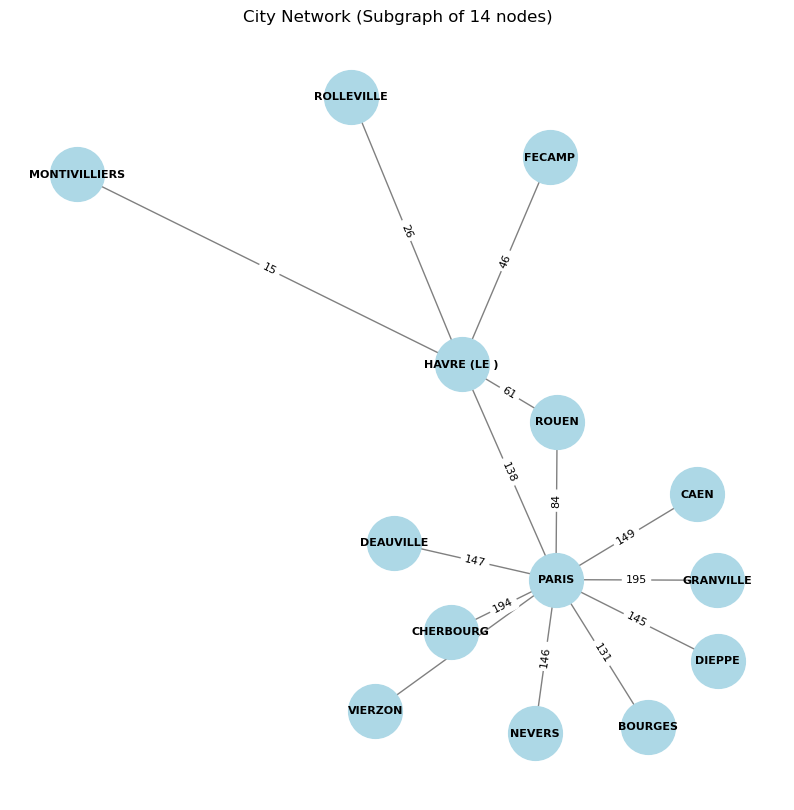

In [42]:
def visualize_graph(graph: nx.Graph) -> None:
    """Visualize the graph using matplotlib with reduced size."""
    plt.figure(figsize=(10, 10))
    
    pos = nx.spring_layout(graph, seed=42)
    plt.title(f"City Network (Subgraph of {len(graph.nodes())} nodes)", fontsize=12)

    nx.draw(graph, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=8, font_weight='bold', edge_color='gray')

    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

    plt.show()

visualize_graph(subgraph)